# <font color=Grey>**Data Mind Classes**</font> 
## <font color=Black>Class 10: Unsupervised Learning : Dimensionality Reduction </font> 

<div class="alert alert-block alert-info">

### ***Table of Contents***

<div class="alert alert-block alert-info">
- Dimensionality Reduction Overview
- Principal Components Analysis
- Factor Analysis

# 1.0 Dimensionality Reduction Overview

- `Necesseciated due to curse of dimensionality in most real world datasets`
- `Typically we can do two things`:
> - `Project n original variables into a new feature space that represents X% of original information with only N new features (N<<n)`
> - `Enable variable selection methods`

- **`Examples`**
> - `.zip/.rar files are a good example of information compression`

- **`Pros:`**
> - `Solves curse of dimensionality`
> - `Makes ML easier to manage on smaller machines`

- **`Cons:`**
> - `Leads to information loss in some cases`
> - `Some dimensionality reduction techniques are very hard to interpret`




# 2.0 Principal Components Analysis (PCA)

- `Linear Transform available features into a new space with principal components that explain variance in the data`
- `Select top k Principals that explain majority of variance in the raw data`
- `Especially useful while dealing with large number of variables when we do not have the luxury of easy plotting `

### 2.1 How it works:

1. `Normalize dataset` ($\mu = 0$)
2. `Calculate covariance matrix`
3. `Calculate eigenvectors and eigenvalues of covariance matrix`
    > - $Mat * Vec = \lambda * Vec$ 
    > - `Vec is eigenvector`
    > - $\lambda$ `is eigenvalue`
    > - `Only for square matrices`
    > - `Not all square matrices have eigenvectors`
4. `Sort eigenvectors by eigenvalues, and select top k`
5. `Resulting components can be interpreted as:`
> - ${PCA}_{i} = \alpha {V}_{1}+\beta {V}_{2} + \gamma {V}_{3} .... \theta {V}_{N}$
6. `All the PCA components are independent of each other; or lie at perpendicular to each other`

** `We will not go into the details of above, however, feel free to check out:`**

http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

### 3.0 PCA walkthough: Iris dataset

In [1]:
import numpy as np ## lin alg
import matplotlib.pyplot as plt ## plot
from mpl_toolkits.mplot3d import Axes3D ## plot
from sklearn import decomposition  ## PCA lib
from sklearn import datasets ## existing dataset

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
### check features of dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
### get PCA components
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

In [20]:
### check % variance explianed
pca.explained_variance_ratio_ 

print("Total variance explained {:.1f}%".format(np.sum(pca.explained_variance_ratio_ )*100))

Total variance explained 99.5%


In [15]:
### inspect PCA dataset
print(X.shape)
X[:5]

(150, 3)


array([[-2.68420713, -0.02151184,  0.32660731],
       [-2.71539062, -0.20352143, -0.16955685],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.0962297 ,  0.33392456]])

C:\Users\rajneesh.tiwari\AppData\Local\conda\conda\envs\python35_env\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


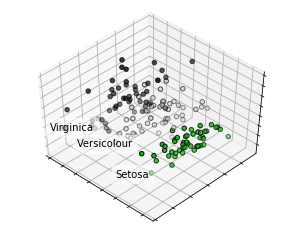

In [6]:
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')
ax.legend()
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

**3.2 `In Class - Exercise:`**
 > `Use the PCA dataset to run a k-fold validation for some classifier that we have studied (Logistic, Decision Tree, RandomForest)`

### 3.3 `Next Steps`:

- `Use the featues from PCA to create a classifier for iris dataset`
- `For Sparse datasets, especially sensor data, there is a separate class of PCA called sparsePCA`
- `What can we do to include non-linear functions for dimensionality reduction - Autoencoders (deep learning classes)`
- `Factor Analysis`

## 4.0 Factor Analysis

- `Dimensionality reduction by doing variable selection`
- `Group variables such that similar trending variables are grouped together`
- `Assign primary groups to each variable`
- `After grouping conduct manual feature selection with preference to variables with higher factor loadings`

In [93]:
### iris data walkthrough
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X, y = iris.data, iris.target
factor = FactorAnalysis(n_components=2,random_state=101).fit(X)

In [94]:
### print feature wise loadings

import pandas as pd
print (pd.DataFrame(factor.components_,columns=iris.feature_names))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.725776         -0.177540           1.757338          0.731964
1          -0.370369         -0.240601           0.027934          0.041214


In [95]:
### viz
pd.DataFrame(factor.components_,columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.725776,-0.177540,1.757338,0.731964
1,-0.370369,-0.240601,0.027934,0.041214


### 4.1 Methodology for variable selection:

- `Ideally we want to represent all the factors in our models as each factor covers orthogonal/uncorrelated spaces`
- `In our case, we only have 2 factors, hence we can select 1 variable with highest abs loading value`
- `Eg: Petal length has highest loading for factor 1, hence to represent factor 0 it is sufficient to include petal length. Similarly, we can select sepal length as a representation (although -ve) for factor 1`. 
- `In summary, instead of including all 4 variables in any modeling exercise, we can only choose top variables from each factor`
- `In case we have more variables, then we can also select more than 1 variable from each factors. Many times, we choose a top loading variabl, a mid loading variable, and a bottom loading variable'

### 4.2 Lets take a look at a different dataset for factor analysis

`(download from`  https://www.sheffield.ac.uk/polopoly_fs/1.536479!/file/birthweight_reduced.csv`)`

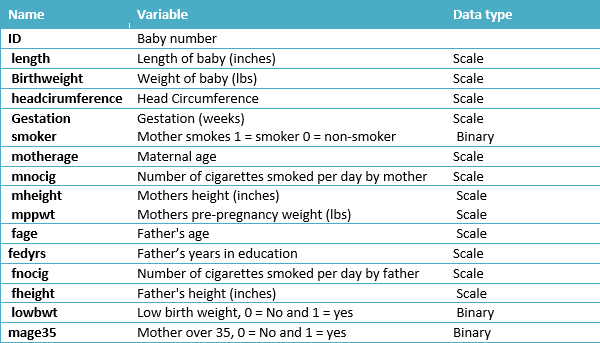

In [40]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis

url="https://www.sheffield.ac.uk/polopoly_fs/1.536479!/file/birthweight_reduced.csv"
data=pd.read_csv(url)
data.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [53]:
### make X & Y dataframes
X_var = [i for i in data.columns if 'LowBirthWeight' not in i and 'id' not in i]
Y_var = 'LowBirthWeight'
X = data[X_var]
Y = data[Y_var]

In [59]:
### run factor analysis
factor = FactorAnalysis(n_components=int(X.shape[1]/3),random_state=101).fit(X)

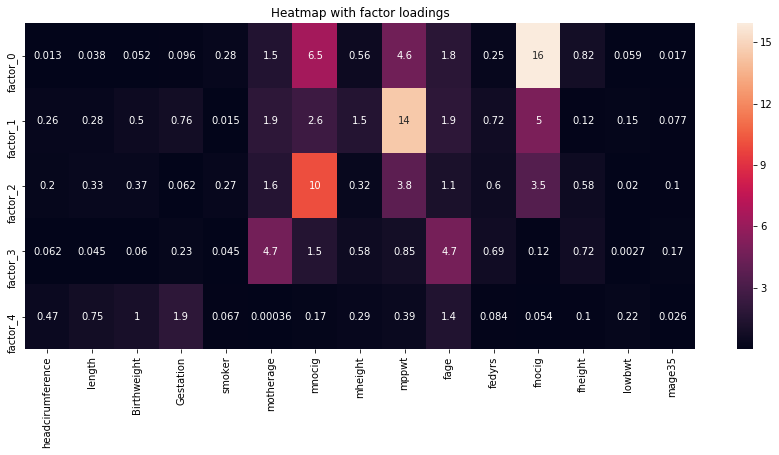

In [83]:
import seaborn as sns
plt.figure(figsize=(15,6))
df = pd.DataFrame(np.abs(factor.components_),columns=X.columns)  ### we do abs as we are more interested in magnitude. similar to correlation
df.index =['factor_'+str(i) for i in df.index];
sns.heatmap(df, annot=True);
plt.title("Heatmap with factor loadings")
plt.show()


In [86]:
### write to csv
df.to_csv("Variable_selection_workbook.csv",index=True)

### End ###